In [1]:
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
import cv2
#from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
#from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

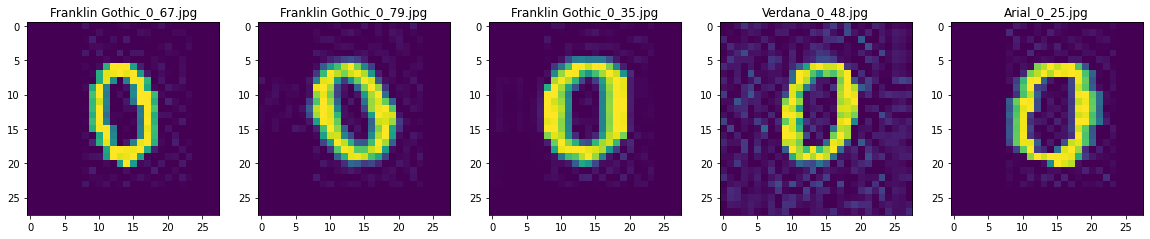

In [9]:
plt.figure(figsize=(20,20))
img_folder=r'/Users/tobiasschulz/Documents/GitHub/digit_dataset/printed_digits/all_train_images/0'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [17]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder='/'

In [21]:

    files = os.listdir(img_folder)
    files = [ x for x in files if ".DS_Store" not in x ]  

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


In [10]:
def create_dataset():
    img_folder ='./Classifier/dataset_images_pytorch/train/'
    output_folder = './Classifier/dataset_images_pytorch/train/edited'

    files = os.listdir(img_folder)
    files = [ x for x in files if ".DS_Store" not in x ]  

    for file in files:
        image= cv2.imread('./Classifier/dataset_images_pytorch/train/' + file)
        #image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        print(image.shape)
        image_reshaped = image.reshape(1,28,28,1)
        test_image = (image_reshaped[...,::-1].astype(np.float32)) / 255.0 
        #image=np.array(image)
        #image = image.astype('float32')
        #image /= 255 
        #img_data_array.append(image)
        #class_name.append(dir1)
        cv2.imwrite('./Classifier/dataset_images_pytorch/train/edited' + file, test_image)


In [11]:
create_dataset()

(28, 28, 3)


ValueError: cannot reshape array of size 2352 into shape (1,28,28,1)

In [22]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]

    folder = os.listdir(img_folder)
    folder = [ x for x in folder if ".DS_Store" not in x ]  

    for dir1 in folder:
        files = os.listdir(os.path.join(img_folder, dir1))
        files = [ x for x in files if ".DS_Store" not in x ] 
        for file in files:
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [23]:
class_name[1]

array([[0.02352941, 0.16470589, 0.1764706 , 0.11372549, 0.10980392,
        0.00784314, 0.07843138, 0.03921569, 0.03921569, 0.04705882,
        0.09411765, 0.        , 0.        , 0.04313726, 0.01960784,
        0.00392157, 0.18039216, 0.02352941, 0.04313726, 0.        ,
        0.1882353 , 0.        , 0.13333334, 0.05098039, 0.00392157,
        0.08627451, 0.02352941, 0.14117648],
       [0.07450981, 0.11764706, 0.        , 0.02745098, 0.06666667,
        0.10588235, 0.07058824, 0.        , 0.01176471, 0.        ,
        0.06666667, 0.10196079, 0.16078432, 0.03921569, 0.        ,
        0.2509804 , 0.        , 0.2       , 0.27058825, 0.        ,
        0.1254902 , 0.        , 0.        , 0.10588235, 0.        ,
        0.        , 0.04705882, 0.03137255],
       [0.08627451, 0.11372549, 0.14901961, 0.        , 0.07843138,
        0.        , 0.03529412, 0.        , 0.16078432, 0.06666667,
        0.        , 0.24705882, 0.        , 0.        , 0.14117648,
        0.        , 0.0627